In [7]:
import os
import json
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

warnings.filterwarnings("ignore")

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")

Seed: 42


In [8]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())
    X = df.drop("target", axis=1)
    y = df["target"]

    display(y.value_counts())
    print("Shape df:", df.shape)
    print("Shape X:", X.shape)
    print("Shape y:", y.shape)
    return X, y

In [10]:
X_train, y_train = read_csv("../data/raw/raw_train.csv")
X_test, y_test = read_csv("../data/raw/raw_test.csv")
X_val, y_val = read_csv("../data/raw/raw_val.csv")

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0,1
1,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,0
4,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df: (242, 14)
Shape X: (242, 13)
Shape y: (242,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.384303,-0.168240,-0.641646,-0.837597,1.071575,1.0,1.000000,0.0,1.0,1.0,0.5,1.0,1.0,1
1,-2.288787,-0.736870,-1.286348,1.061736,-0.891627,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.829818,-0.054513,-0.357219,-0.175039,0.714629,1.0,0.666667,0.0,0.0,0.0,0.5,1.0,1.0,0
3,-0.395349,-0.054513,0.116827,-0.042528,-0.445445,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-1.397757,-0.623144,-0.186562,1.945146,-0.177735,1.0,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df: (31, 14)
Shape X: (31, 13)
Shape y: (31,)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,-1.063621,0.400391,-0.262410,0.089984,-0.713154,0.0,1.000000,0.0,1.0,1.0,0.5,0.0,0.0,0
1,1.720848,-0.054513,1.368307,-1.809349,1.250048,1.0,1.000000,0.0,1.0,0.0,0.5,1.0,0.0,1
2,-0.061212,1.082748,-0.338257,0.664201,0.536156,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.941197,0.229802,0.040979,0.973394,-0.891627,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.495681,0.229802,-0.300333,0.487519,-0.445445,1.0,1.000000,0.0,0.0,0.0,0.5,0.0,1.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df: (30, 14)
Shape X: (30, 13)
Shape y: (30,)


In [12]:
X_train_fe, y_train_fe = read_csv("../data/fe/fe_train.csv")
X_test_fe, y_test_fe = read_csv("../data/fe/fe_test.csv")
X_val_fe, y_val_fe = read_csv("../data/fe/fe_val.csv")

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_0.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,0.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,0.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,1.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,0.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,1.0,1


target
0    131
1    111
Name: count, dtype: int64

Shape df: (242, 14)
Shape X: (242, 13)
Shape y: (242,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_0.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,0.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,0.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,0.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,1.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,0.0,0


target
0    17
1    14
Name: count, dtype: int64

Shape df: (31, 14)
Shape X: (31, 13)
Shape y: (31,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_0.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,1.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,0.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,0.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,1.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,0.0,0


target
0    16
1    14
Name: count, dtype: int64

Shape df: (30, 14)
Shape X: (30, 13)
Shape y: (30,)


# Naive Bayes Classifier

In [55]:
def evaluate_val(X_train, y_train, X_val, y_val):
    nbc_model = GaussianNB()
    nbc_model.fit(X_train, y_train)

    nb_pred = nbc_model.predict(X_val)
    nb_accurary = accuracy_score(y_val, nb_pred)

    print("Validation Accuracy of Naive Bayes Classifier: {:.2f}%".format(nb_accurary * 100))
    print("\nClassification Report:")
    print(classification_report(y_val, nb_pred))
    return nbc_model, nb_accurary

def evaluate_test(nbc_model, X_test, y_test):
    nb_test_pred = nbc_model.predict(X_test)
    nb_test_accurary = accuracy_score(y_test, nb_test_pred)

    print("Test Accuracy of Naive Bayes Classifier: {:.2f}%".format(nb_test_accurary * 100))
    print("\nClassification Report:")
    print(classification_report(y_test, nb_test_pred))
    return nb_test_accurary

In [56]:
model, accuracy = evaluate_val(X_train, y_train, X_val, y_val)
test_accuracy = evaluate_test(model, X_test, y_test)

Validation Accuracy of Naive Bayes Classifier: 90.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

Test Accuracy of Naive Bayes Classifier: 83.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



In [57]:
model_fe, accuracy_fe = evaluate_val(X_train_fe, y_train_fe, X_val_fe, y_val_fe)
test_accuracy_fe = evaluate_test(model_fe, X_test_fe, y_test_fe)

Validation Accuracy of Naive Bayes Classifier: 90.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.82      1.00      0.90        14

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

Test Accuracy of Naive Bayes Classifier: 83.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



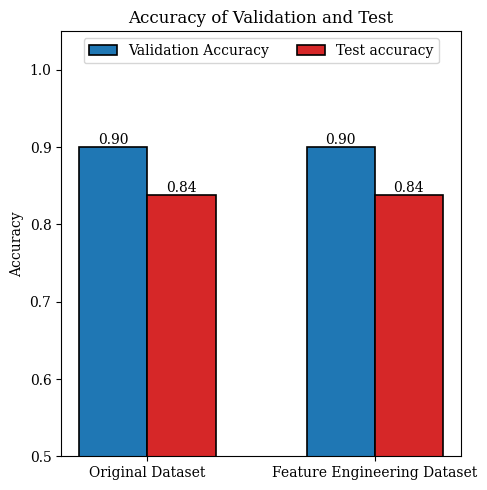

In [58]:
plt.rcParams['font.family'] = "DejaVu Serif"
labels = ['Original Dataset', 'Feature Engineering Dataset']
val_accs = [accuracy, accuracy_fe]
test_accs = [test_accuracy, test_accuracy_fe]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize= (5,5))
rects1 = ax.bar(x - width/2, val_accs, width,
                label= "Validation Accuracy",
                color="tab:blue", edgecolor="black",linewidth = 1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label="Test accuracy",
                color = "tab:red", edgecolor = "black", linewidth = 1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of Validation and Test")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol= 2, loc="upper center")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f"{h:.2f}",xy=(rect.get_x() + rect.get_width() / 2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# K-Nearest Neighbors

In [25]:
def find_optimal_k(X_train, y_train, X_val=None, y_val=None,
                    k_range=range(1, 21), cv_splits=5):
    
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    k_scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
        k_scores.append(scores.mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(k_range), k_scores, "bo-")
    plt.title(f"Find Optimal K for KNN Classifier (using CV={cv_splits}-Fold)")
    plt.xlabel("Number of Neighbors K")
    plt.ylabel("Cross-Validated Accuracy")
    plt.grid(True)
    plt.show()

    optimal_k = list(k_range)[int(np.argmax(k_scores))]
    print(f"Optimal K (CV): {optimal_k}")
    return optimal_k

def evaluate_val(X_train, y_train, X_val, y_val, optimal_k):
    print("Training K-Nearest Neighbors Classifier with Optimal K", optimal_k)
    knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
    knn_model.fit(X_train, y_train)

    knn_pred = knn_model.predict(X_val)
    knn_accurary = accuracy_score(y_val, knn_pred)

    print("Validation Accuracy of K-Nearest Neighbors: {:.2f}%".format(knn_accurary * 100))
    print("\nClassification Report:")
    print(classification_report(y_val, knn_pred))
    return knn_model, knn_accurary

def evaluate_test(knn_model, X_test, y_test):
    knn_test_pred = knn_model.predict(X_test)
    knn_test_accurary = accuracy_score(y_test, knn_test_pred)

    print("Test Accuracy of K-Nearest Neighbors: {:.2f}%".format(knn_test_accurary * 100))
    print("\nClassification Report:")
    print(classification_report(y_test, knn_test_pred))
    return knn_test_accurary

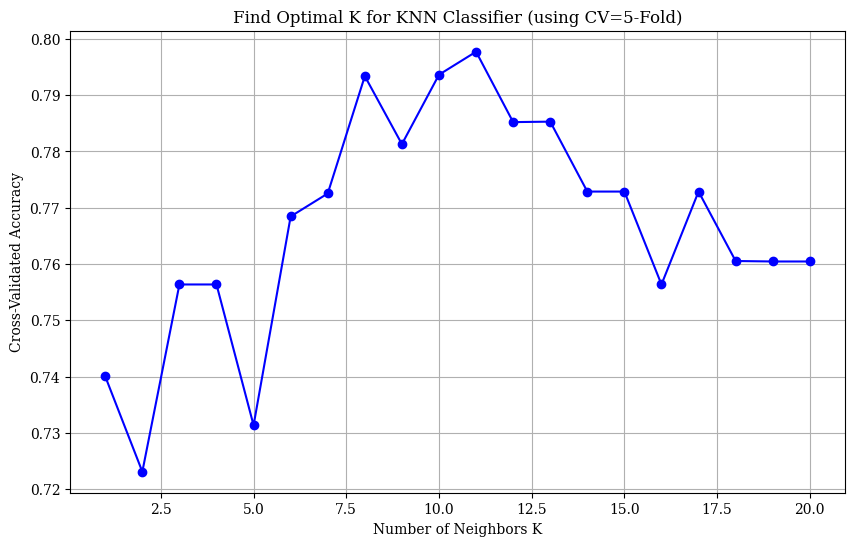

Optimal K (CV): 11
Training K-Nearest Neighbors Classifier with Optimal K 11
Validation Accuracy of K-Nearest Neighbors: 90.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Test Accuracy of K-Nearest Neighbors: 83.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.85      0.79      0.81        14

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



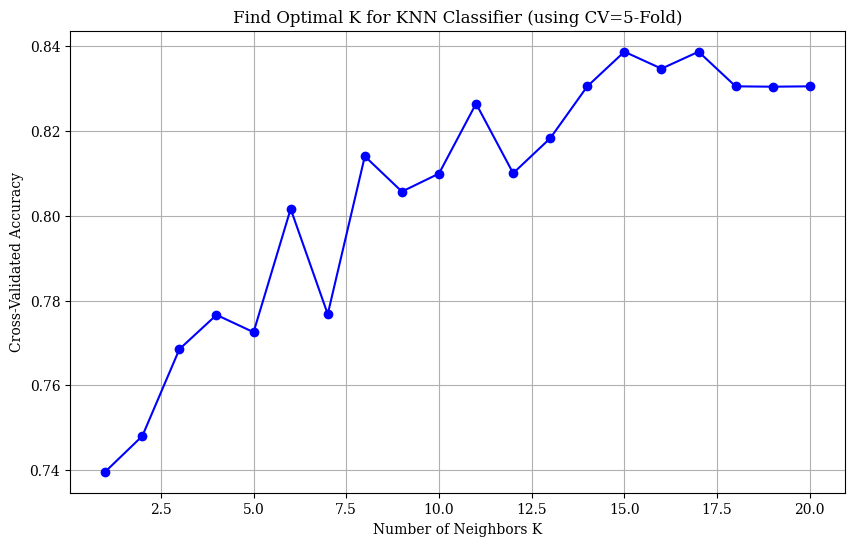

Optimal K (CV): 15
Training K-Nearest Neighbors Classifier with Optimal K 15
Validation Accuracy of K-Nearest Neighbors: 90.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Test Accuracy of K-Nearest Neighbors: 83.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



In [26]:
k_optimal = find_optimal_k(X_train, y_train, X_val, y_val)
model, accuaracy = evaluate_val(X_train, y_train, X_val, y_val, k_optimal)
test_accuracy = evaluate_test(model, X_test, y_test)

k_optimal = find_optimal_k(X_train_fe, y_train_fe, X_val_fe, y_val_fe)
model_fe, accuaracy_fe = evaluate_val(X_train_fe, y_train_fe,
                                        X_val_fe, y_val_fe, k_optimal)
test_accuracy_fe = evaluate_test(model_fe, X_test_fe, y_test_fe)

# Decision Tree

In [30]:
def find_optimal_depth(X_train, y_train, X_val=None, y_val=None,
                        depth_range=range(1, 11), cv_splits=5, min_depth=2):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    depth_scores = []

    for depth in  range(min_depth, depth_range.stop):
        dt = DecisionTreeClassifier(max_depth=depth, random_state=SEED)
        cv_score = cross_val_score(
            dt, X_train, y_train,
            cv=cv, scoring = 'accuracy', n_jobs=-1
        )
        depth_scores.append(cv_score.mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(range(min_depth, depth_range.stop)), depth_scores, "bo-")
    plt.title(f"Find Optimal Depth for Decision Tree Classifier (using CV={cv_splits}-Fold)")
    plt.xlabel("Max Depth")
    plt.ylabel("Cross-Validated Accuracy")
    plt.grid(True)
    plt.show()

    optimal_depth = list(range(min_depth, depth_range.stop))[int(np.argmax(depth_scores))]
    print(f"Optimal Depth (CV): {optimal_depth}")
    return optimal_depth

def evaluate_val(X_train, y_train, X_val, y_val, optimal_depth):
    dt_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=SEED)
    dt_model.fit(X_train, y_train)

    dt_pred = dt_model.predict(X_val)
    dt_accuracy = accuracy_score(y_val, dt_pred)
    print(f"\nValidation Accuracy of Decision Tree Classifier: {dt_accuracy:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_val, dt_pred))
    return dt_model, dt_accuracy

def evaluate_test(dt_model, X_test, y_test):
    dt_test_pred = dt_model.predict(X_test)
    dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
    print(f"\nTest Accuracy of Decision Tree Classifier: {dt_test_accuracy:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, dt_test_pred))
    return dt_test_accuracy

def display_feature_importance(dt_model, X_train):
    feature_importances = pd.DataFrame({
        "feature": X_train.columns,
        "importance": dt_model.feature_importances_
    }).sort_values(by="importance", ascending=False)

    print("\nFeature Importances:")
    display(feature_importances.head(10))

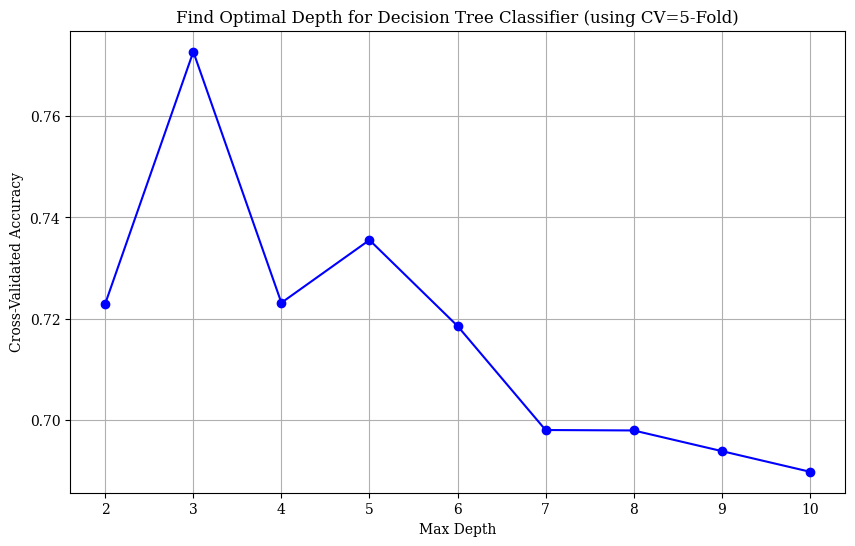

Optimal Depth (CV): 3

Validation Accuracy of Decision Tree Classifier: 0.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Test Accuracy of Decision Tree Classifier: 0.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


Feature Importances:


,feature,importance
12,thal,0.536927
6,cp,0.194140
11,ca,0.168773
4,oldpeak,0.066853
0,age,0.033307
1,trestbps,0.000000
2,chol,0.000000
3,thalach,0.000000
5,sex,0.000000
7,fbs,0.000000


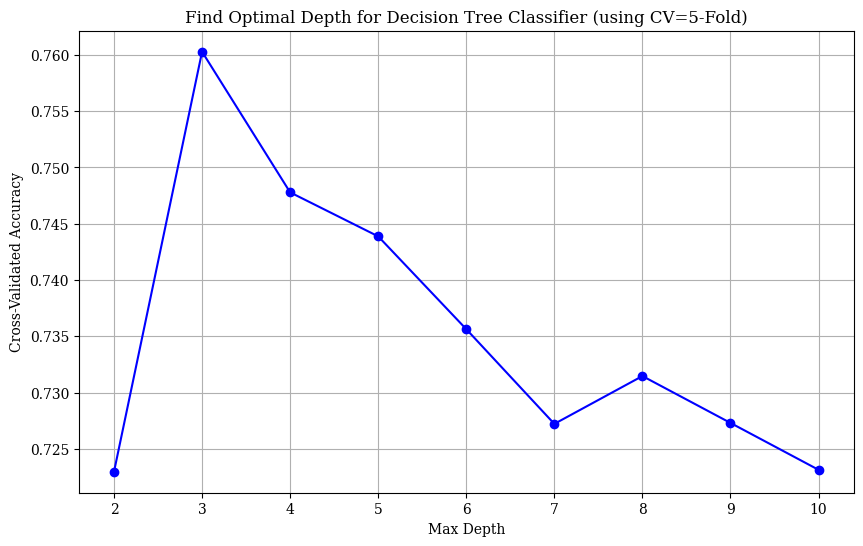

Optimal Depth (CV): 3

Validation Accuracy of Decision Tree Classifier: 0.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Test Accuracy of Decision Tree Classifier: 0.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31


Feature Importances:


,feature,importance
0,thal_3.0,0.535670
2,cp_4.0,0.193685
3,ca_0.0,0.168378
6,oldpeak,0.066697
11,hr_ratio,0.035570
1,thal_7.0,0.000000
4,exang_1.0,0.000000
5,exang_0.0,0.000000
7,slope_1.0,0.000000
8,chol,0.000000


In [31]:
depth_optimal = find_optimal_depth(X_train, y_train, X_val, y_val)
model, accuracy = evaluate_val(X_train, y_train, X_val, y_val, depth_optimal)
test_accuracy = evaluate_test(model, X_test, y_test)
display_feature_importance(model, X_train)

depth_optimal = find_optimal_depth(X_train_fe, y_train_fe, X_val_fe, y_val_fe)
model_fe, accuracy_fe = evaluate_val(X_train_fe, y_train_fe, X_val_fe, y_val_fe, depth_optimal)
test_accuracy_fe = evaluate_test(model_fe, X_test_fe, y_test_fe)
display_feature_importance(model_fe, X_train_fe)


# K-Means

In [34]:
def evaluate_val(X_train, y_train, X_val, y_val):
    kmean_model = KMeans(n_clusters=2, random_state=SEED, init="random")
    kmean_model.fit(X_train)

    val_clusters = kmean_model.predict(X_val)
    train_cluster = kmean_model.labels_
    cluster_class_mapping = {
        cluster_id: Counter(y_train[train_cluster == cluster_id]).most_common(1)[0][0]
        for cluster_id in np.unique(train_cluster)
    }

    kmeans_pred = np.array([cluster_class_mapping[cluster_id] for cluster_id in val_clusters])
    kmeans_accuracy = accuracy_score(y_val, kmeans_pred)

    print('Accuracy of K-Means Clustering on Validation Set: {:.2f}%'.format(kmeans_accuracy * 100))
    print("\nClassification Report:")
    print(classification_report(y_val, kmeans_pred))
    return kmean_model, kmeans_accuracy

def evaluate_test(kmean_model, X_test, y_test):
    test_clusters = kmean_model.predict(X_test)
    train_clusters = kmean_model.labels_
    cluster_class_mapping = {
        cluster_id: Counter(y_train[train_clusters == cluster_id]).most_common(1)[0][0]
        for cluster_id in np.unique(train_clusters)
    }

    kmeans_test_pred = np.array([cluster_class_mapping[cluster_id] for cluster_id in test_clusters])
    kmeans_test_accuracy = accuracy_score(y_test, kmeans_test_pred)

    print('Accuracy of K-Means Clustering on Test Set: {:.2f}%'.format(kmeans_test_accuracy * 100))
    print("\nClassification Report:")
    print(classification_report(y_test, kmeans_test_pred))
    return kmeans_test_accuracy

In [35]:
model, accuracy = evaluate_val(X_train, y_train, X_val, y_val)
test_accuracy = evaluate_test(model, X_test, y_test)

model_fe, accuracy_fe = evaluate_val(X_train_fe, y_train_fe, X_val_fe, y_val_fe)
test_accuracy_fe = evaluate_test(model_fe, X_test_fe, y_test_fe)

Accuracy of K-Means Clustering on Validation Set: 70.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.69      0.64      0.67        14

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30

Accuracy of K-Means Clustering on Test Set: 87.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.81      0.93      0.87        14

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31

Accuracy of K-Means Clustering on Validation Set: 80.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16


# Ensemble Model

In [59]:
def init_model():
    ensemble_model = StackingClassifier(
        estimators=[
            ('knn', KNeighborsClassifier()),
            ('dt', DecisionTreeClassifier(random_state=SEED)),
            ('nb', GaussianNB())
        ],
        final_estimator=KNeighborsClassifier(),
        stack_method="predict_proba",
        passthrough=False
    )
    display(ensemble_model)
    return ensemble_model

In [60]:
def evaluate_ensemble(ensemble_model, X_train, y_train, X_val, y_val):
    ensemble_model.fit(X_train, y_train)
    ensemble_val_pred = ensemble_model.predict(X_val)
    ensemble_val_accuracy = accuracy_score(y_val, ensemble_val_pred)
    print('Accuracy of Ensemble Model on Validation Set: {:.2f}%'.format(ensemble_val_accuracy * 100))
    print("\nClassification Report:")
    print(classification_report(y_val, ensemble_val_pred))
    return ensemble_model, ensemble_val_accuracy
    
def evaluate_ensemble_test(ensemble_model, X_test, y_test):
    ensemble_test_pred = ensemble_model.predict(X_test)
    ensemble_test_accuracy = accuracy_score(y_test, ensemble_test_pred)
    print('Accuracy of Ensemble Model on Test Set: {:.2f}%'.format(ensemble_test_accuracy * 100))
    print("\nClassification Report:")
    print(classification_report(y_test, ensemble_test_pred))
    return ensemble_test_accuracy

In [61]:
ensemble_model = init_model()
accuracy = evaluate_ensemble(ensemble_model, X_train, y_train, X_val, y_val)

test_accuracy = evaluate_ensemble_test(ensemble_model, X_test, y_test)

,estimators,"[('knn', ...), ('dt', ...), ...]"
,final_estimator,KNeighborsClassifier()
,cv,None
,stack_method,'predict_proba'
,n_jobs,None
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


Accuracy of Ensemble Model on Validation Set: 86.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.86      0.86      0.86        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Accuracy of Ensemble Model on Test Set: 83.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



In [62]:
ensemble_model_fe = init_model()
accuracy_fe = evaluate_ensemble(ensemble_model_fe, X_train_fe, y_train_fe, X_val_fe, y_val_fe)
test_accuracy_fe = evaluate_ensemble_test(ensemble_model_fe, X_test_fe, y_test_fe)

,estimators,"[('knn', ...), ('dt', ...), ...]"
,final_estimator,KNeighborsClassifier()
,cv,None
,stack_method,'predict_proba'
,n_jobs,None
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


Accuracy of Ensemble Model on Validation Set: 93.33%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

Accuracy of Ensemble Model on Test Set: 90.32%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.82      1.00      0.90        14

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



In [52]:
np.arange(2) - 0.3

array([-0.3,  0.7])

In [65]:
val_accs = [accuracy, accuracy_fe]
val_accs

[(StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                 ('dt', DecisionTreeClassifier(random_state=42)),
                                 ('nb', GaussianNB())],
                     final_estimator=KNeighborsClassifier(),
                     stack_method='predict_proba'),
  0.8666666666666667),
 (StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                 ('dt', DecisionTreeClassifier(random_state=42)),
                                 ('nb', GaussianNB())],
                     final_estimator=KNeighborsClassifier(),
                     stack_method='predict_proba'),
  0.9333333333333333)]

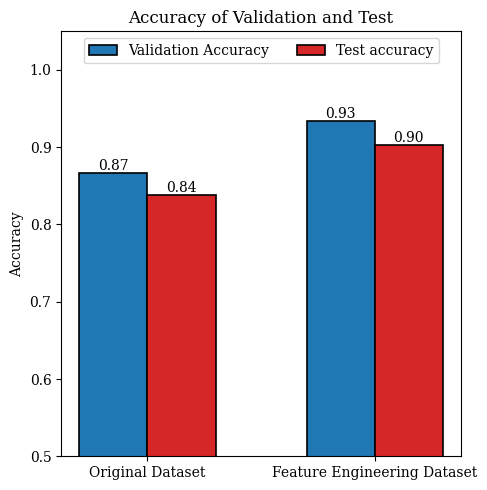

In [68]:
plt.rcParams['font.family'] = "DejaVu Serif"
labels = ['Original Dataset', 'Feature Engineering Dataset']
val_accs = [accuracy[1], accuracy_fe[1]]
test_accs = [test_accuracy, test_accuracy_fe]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize= (5,5))
rects1 = ax.bar(x - width/2, val_accs, width,
                label= "Validation Accuracy",
                color="tab:blue", edgecolor="black",linewidth = 1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label="Test accuracy",
                color = "tab:red", edgecolor = "black", linewidth = 1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of Validation and Test")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol= 2, loc="upper center")
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f"{h:.2f}",xy=(rect.get_x() + rect.get_width() / 2, h),
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()